# Imports

In [1]:
%load_ext autoreload

In [2]:
import numpy as np
from src import *

%autoreload 2

# Signal

In [3]:
# Signal width
N = 128

# Sparse signal parameters
sparse_range = (-6, 6)
density = 0.005

# Smooth signal parameters
smooth_amplitude = 2
sigmas_range = (2e-2, 2e-1)
nb_gaussian = int(0.5 * N)

# Seed
seed = 42

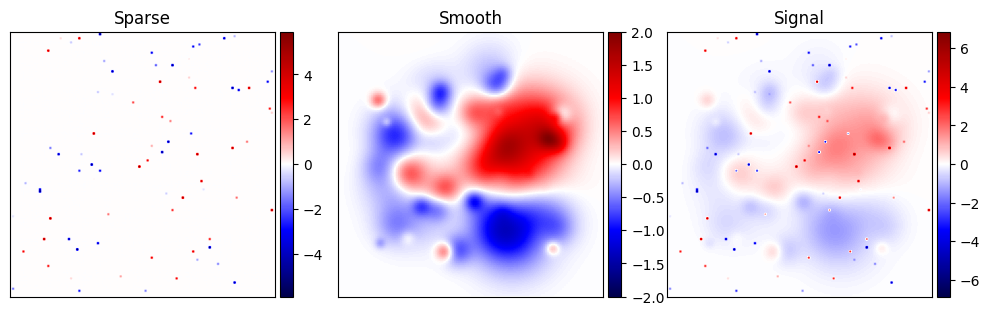

In [4]:
sparse_signal = compute_sparse(N, sparse_range, density, seed)
smooth_signal = compute_smooth(N, smooth_amplitude, sigmas_range, nb_gaussian, seed)

signal = sparse_signal + smooth_signal

plot_signal(sparse_signal, smooth_signal)

# Operator $\phi$

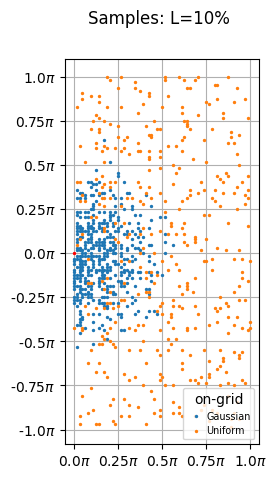

In [5]:
L = 0.1
theta = 0.5
op = NuFFT(N, L, theta, on_grid=True, seed=seed)

x0 = signal.reshape(-1)
y0 = op(x0)

psnr = 50
y = compute_y(y0, psnr)

op.plot_samples()

# Solver

In [6]:
# Loss weights
lambda1 = 1e-2
lambda2 = 5e-2

# Use Laplacian ?
laplacian = True

### Coupled

In [7]:
coupled = True

x1, x2 = solve(y, op, lambda1, lambda2, coupled, laplacian)

Coupled
INFO -- [2023-12-07 17:55:47.080397] Iteration 0
	iteration: 0
	N_iter: 1.0
	RelError[x]: 0.0
INFO -- [2023-12-07 17:56:04.856627] Iteration 500
	iteration: 500
	N_iter: 501.0
	RelError[x]: 0.0005928742407113948
INFO -- [2023-12-07 17:56:12.948255] Iteration 722
	iteration: 722
	N_iter: 723.0
	RelError[x]: 9.940484548177281e-05
INFO -- [2023-12-07 17:56:12.949152] Stopping Criterion satisfied -> END


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x150419000>


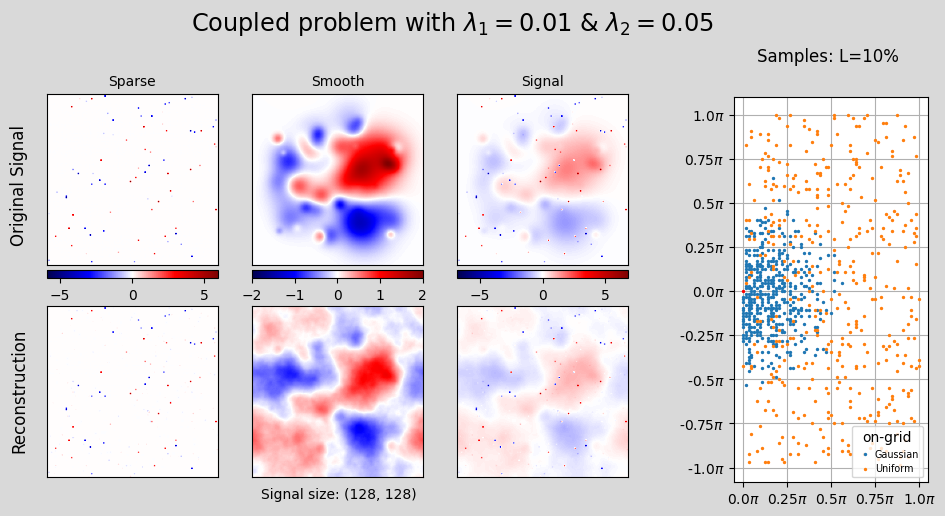

Button(description='SAVE', style=ButtonStyle())

Output()

In [8]:
sparse_rcstr, smooth_rcstr, signal_rcstr = map(
    lambda x: x.reshape((N,N)), (x1, x2, x1 + x2)
)

fig = plot_results(
    [sparse_signal, smooth_signal],
    [sparse_rcstr, smooth_rcstr],
    lambda1,
    lambda2,
    op,
    coupled,
)

save_widget(fig, lambda1, lambda2, op, psnr, coupled)

### Decoupled

In [9]:
coupled = False

x1_, x2_ = solve(y, op, lambda1, lambda2, coupled, laplacian)


Decoupled
Co-Gram Identity
INFO -- [2023-12-07 17:56:21.664899] Iteration 0
	iteration: 0
	N_iter: 1.0
	RelError[x]: 0.0
INFO -- [2023-12-07 17:56:24.092705] Iteration 242
	iteration: 242
	N_iter: 243.0
	RelError[x]: 9.779044450041542e-06
INFO -- [2023-12-07 17:56:24.093609] Stopping Criterion satisfied -> END


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1519e3640>


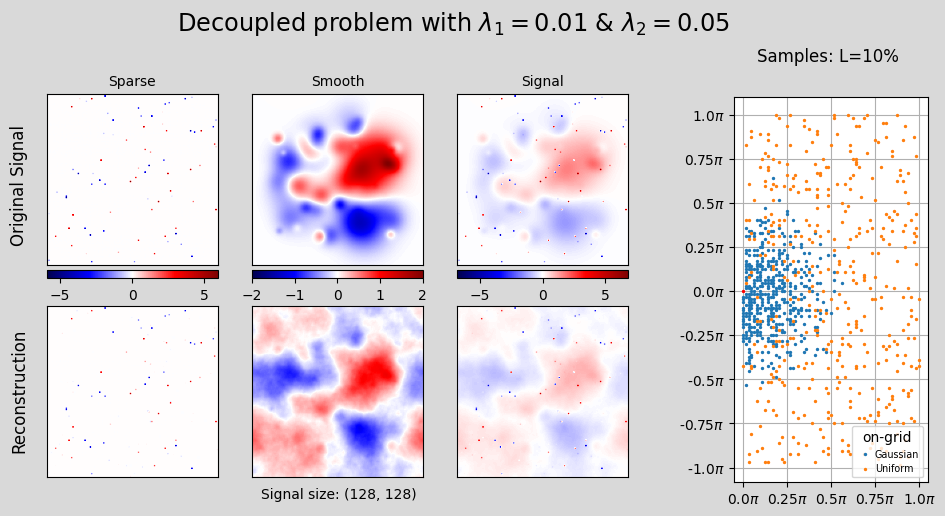

Button(description='SAVE', style=ButtonStyle())

Output()

In [10]:
sparse_rcstr_, smooth_rcstr_, signal_rcstr_ = map(
    lambda x: x.reshape((N,N)), (x1_, x2_, x1_ + x2_)
)

fig = plot_results(
    [sparse_signal, smooth_signal],
    [sparse_rcstr_, smooth_rcstr_],
    lambda1,
    lambda2,
    op,
    coupled,
)

save_widget(fig, lambda1, lambda2, op, psnr, coupled)

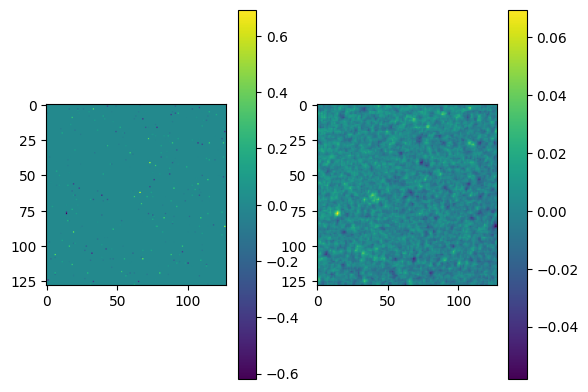

In [11]:
plt.subplot(121)
plt.imshow(sparse_rcstr - sparse_rcstr_)
plt.colorbar()
plt.subplot(122)
plt.imshow(smooth_rcstr - smooth_rcstr_)
plt.colorbar()